## Understanding the Problem by Understanding the Data ##

In [2]:
import urllib.request
import sys
import numpy as np
import pylab
import scipy.stats as stats

### Data source ###

In [5]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")

In [16]:
data = urllib.request.urlopen(target_url)

In [17]:
xList = []
labels = []

### Determine size and shape ###

In [18]:
for line in data:
    row = line.decode('utf8').strip().split(",")
    xList.append(row)

In [19]:
sys.stdout.write("Number of Rows of Data = " + str(len(xList)) + "\n")
sys.stdout.write("Number of Columns of Data = " + str(len(xList[0])) + "\n")

Number of Rows of Data = 208
Number of Columns of Data = 61


### Determine data type: numerical, categorical or empty ###

In [20]:
nrow = len(xList)
ncol = len(xList[0])

In [21]:
type = [0] * 3
colCounts = []

In [22]:
for col in range(ncol):
    for row in xList:
        try:
            a = float(row[col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 1
    colCounts.append(type)
    type = [0] * 3

In [23]:
sys.stdout.write("Col#" + '\t\t' + "Number" + '\t\t' + "String" + '\t\t' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t\t' + str(types[0]) + '\t\t' + str(types[1]) + '\t\t' + str(types[2]) + '\n')
    iCol += 1

Col#		Number		String		Other
0		208		0		0
1		208		0		0
2		208		0		0
3		208		0		0
4		208		0		0
5		208		0		0
6		208		0		0
7		208		0		0
8		208		0		0
9		208		0		0
10		208		0		0
11		208		0		0
12		208		0		0
13		208		0		0
14		208		0		0
15		208		0		0
16		208		0		0
17		208		0		0
18		208		0		0
19		208		0		0
20		208		0		0
21		208		0		0
22		208		0		0
23		208		0		0
24		208		0		0
25		208		0		0
26		208		0		0
27		208		0		0
28		208		0		0
29		208		0		0
30		208		0		0
31		208		0		0
32		208		0		0
33		208		0		0
34		208		0		0
35		208		0		0
36		208		0		0
37		208		0		0
38		208		0		0
39		208		0		0
40		208		0		0
41		208		0		0
42		208		0		0
43		208		0		0
44		208		0		0
45		208		0		0
46		208		0		0
47		208		0		0
48		208		0		0
49		208		0		0
50		208		0		0
51		208		0		0
52		208		0		0
53		208		0		0
54		208		0		0
55		208		0		0
56		208		0		0
57		208		0		0
58		208		0		0
59		208		0		0
60		0		208		0


### Statistical summaries of data set ###

#### generate summary statistics for column 3 ####

In [24]:
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))

In [25]:
colArray = np.array(colData)

In [26]:
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + "\t" + str(colMean) + "\t\t" + "Standard Deviation = " + "\t" + str(colsd) + "\n")

Mean = 	0.053892307692307684		Standard Deviation = 	0.04641598322260027


#### calculate quantile boundaries to reveal outliers ####

In [27]:
ntiles = 4
percentBdry = []

In [28]:
for i in range(ntiles + 1):
    percentBdry.append(np.percentile(colArray, i*100/ntiles))
sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write("\n")


Boundaries for 4 Equal Percentiles 
[0.0058, 0.024375, 0.04405, 0.0645, 0.4264]



In [29]:
ntiles = 10
percentBdry = []

In [30]:
for i in range(ntiles + 1):
    percentBdry.append(np.percentile(colArray, i*100/ntiles))
sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write("\n")


Boundaries for 4 Equal Percentiles 
[0.0058, 0.0141, 0.022740000000000003, 0.027869999999999995, 0.03622, 0.04405, 0.05071999999999999, 0.059959999999999986, 0.07794000000000001, 0.10836, 0.4264]



#### last column contains categorical variables ####

In [31]:
col = 60
colData = []
for row in xList:
    colData.append(row[col])

In [32]:
unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)

Unique Label Values 
{'R', 'M'}


In [33]:
catDict = dict(zip(list(unique), range(len(unique))))
catCount = [0] * 2

In [34]:
for elt in colData:
    catCount[catDict[elt]] += 1
sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)


Counts for Each Value of Categorical Label 
['R', 'M']
[97, 111]


### Visualization of Outliers ###

#### generate statistical for column 3 ####

In [35]:
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))

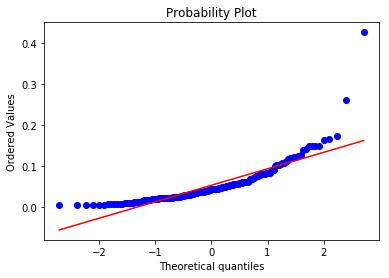

In [36]:
stats.probplot(colData, dist = "norm", plot = pylab)
pylab.show()

### andas can help automate the process of data inspection and handling. Use pandas to process data. It reads data into a specialized data structure called *data frame*. ###

In [3]:
import pandas as pd
import matplotlib.pyplot as plot

In [6]:
rocksVMines = pd.read_csv(target_url, header = None, prefix = "V")

In [7]:
print(rocksVMines.head())
print(rocksVMines.tail())

       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

In [8]:
summary = rocksVMines.describe()
print(summary)

               V0          V1          V2          V3          V4          V5  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               V6          V7          V8          V9     ...             V50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.0851

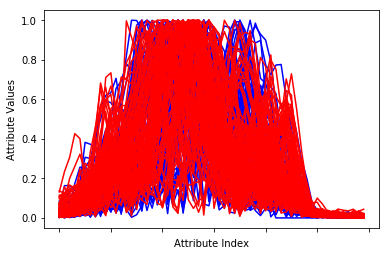

In [10]:
for i in range(208):
    if rocksVMines .iat[i, 60] == "M":
        pcolor = "red"
    else:
        pcolor = "blue"
    dataRow = rocksVMines.iloc[i, 0:60]
    dataRow.plot(color = pcolor)
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()